Blurred Data Generation (Natural Images) for NN Training
========================================================

This example demonstrates how to generate blurred image data for
training neural network models for deconvolution (deblurring). The
original images are part of the [BSDS500 dataset]
(http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/)
provided by the Berkeley Segmentation Dataset and Benchmark project.

In [1]:
import numpy as np

from jax import vmap

from scico import plot
from scico.flax.examples import PaddedCircularConvolve, load_image_data
plot.config_notebook_plotting()

Define blur operator.

In [2]:
output_size = 256  # patch size
channels = 1  # gray scale problem
blur_shape = (9, 9)  # shape of blur kernel
blur_sigma = 5  # Gaussian blur kernel parameter

opBlur = PaddedCircularConvolve(output_size, channels, blur_shape, blur_sigma)

opBlur_vmap = vmap(opBlur)  # for batch processing

Read data from cache or generate if not available.

In [3]:
train_nimg = 400  # number of training images
test_nimg = 64  # number of testing images
nimg = train_nimg + test_nimg
gray = True  # use gray scale images
data_mode = "dcnv"  # deconvolution problem
noise_level = 0.005  # standard deviation of noise
noise_range = False  # use fixed noise level
stride = 100  # stride to sample multiple patches from each image
augment = True  # augment data via rotations and flips


train_ds, test_ds = load_image_data(
    train_nimg,
    test_nimg,
    output_size,
    gray,
    data_mode,
    verbose=True,
    noise_level=noise_level,
    noise_range=noise_range,
    transf=opBlur_vmap,
    stride=stride,
    augment=augment,
)

Storing data in path      :   ~/.cache/scico/examples/data
Set --training--          :   Size:   3600
Set --testing --          :   Size:   192
Data range -- images --   :    Min:   0.00, Max: 0.84
Data range -- labels --   :    Min:   0.00, Max: 1.00


Plot randomly selected sample.

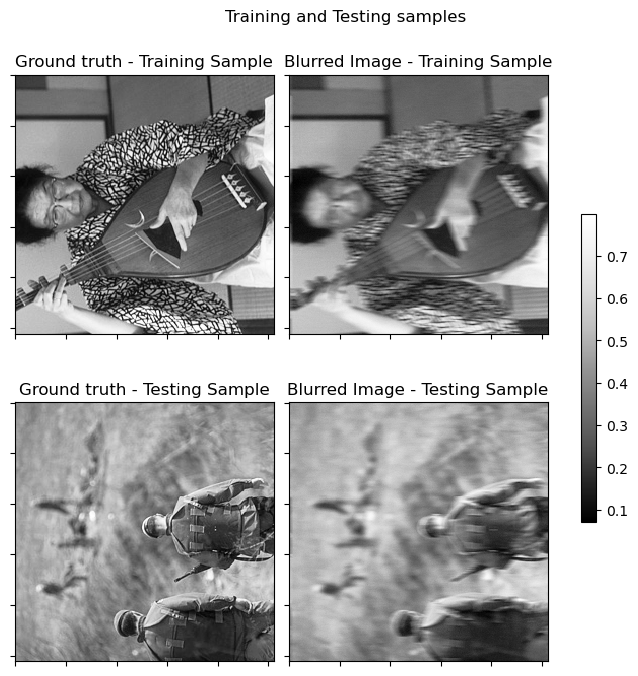

In [4]:
indx_tr = np.random.randint(0, train_nimg)
indx_te = np.random.randint(0, test_nimg)
fig, axes = plot.subplots(nrows=2, ncols=2, figsize=(7, 7))
plot.imview(
    train_ds["label"][indx_tr, ..., 0],
    title="Ground truth - Training Sample",
    fig=fig,
    ax=axes[0, 0],
)
plot.imview(
    train_ds["image"][indx_tr, ..., 0],
    title="Blurred Image - Training Sample",
    fig=fig,
    ax=axes[0, 1],
)
plot.imview(
    test_ds["label"][indx_te, ..., 0],
    title="Ground truth - Testing Sample",
    fig=fig,
    ax=axes[1, 0],
)
plot.imview(
    test_ds["image"][indx_te, ..., 0],
    title="Blurred Image - Testing Sample",
    fig=fig,
    ax=axes[1, 1],
)
fig.suptitle(r"Training and Testing samples")
fig.tight_layout()
fig.colorbar(
    axes[0, 1].get_images()[0],
    ax=axes,
    shrink=0.5,
    pad=0.05,
)
fig.show()